<a href="https://colab.research.google.com/github/scostab2106/Python_Projects/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CÓDIGO TODO FEITO EM INGLêS PARA SE PARECER O MÁXIMO POSSÍVEL COM UM PROJETO FUNCIONAL**


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfd
import matplotlib.pyplot as plt

In [16]:

dataset, info = tfd.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [7]:
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = image / 255.0
    return image, label

train_data = dataset['train'].map(preprocess).batch(32)
test_data = dataset['train'].map(preprocess).batch(32)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

In [10]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=test_data)

In [13]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Accuracy in test: {test_acc:.4f}")


727/727 ━━━━━━━━━━━━━━━━━━━━ 427s 587ms/step - accuracy: 0.9740 - loss: 0.0609
Acurácia no teste: 0.9758


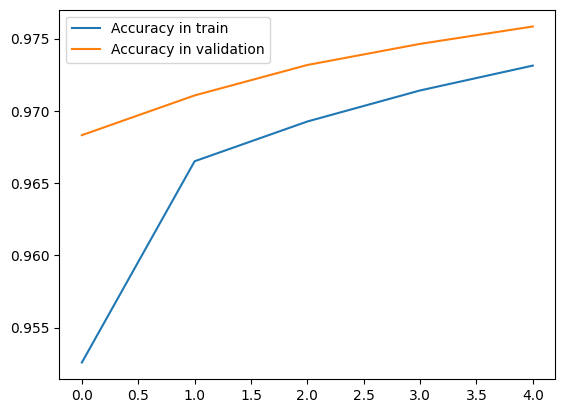

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy in train')
plt.plot(history.history['val_accuracy'], label='Accuracy in validation')
plt.legend()
plt.show()